### Preface
Dalam notebook ini akan mengeksplorasi data tinggi gelombang dengan python, dan menerapkan model machine learning untuk memprediksi data.

### Import library

In [75]:
# import library pendukung
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Persiapan Data
Disini akan digunakan data pendukung, yaitu data tinggi gelombang signifikan yang diperoleh dari situs [ECMWF](https://www.ecmwf.int/).

In [76]:
import pandas as pd

# import data
hmax = pd.read_csv('hmax_interim_pangandaran.csv')

display(hmax.head())
print()
print(hmax.info())

,waktu,Pangandaran
0,2016-08-31 00:00:00,4.501797
1,2016-08-31 06:00:00,4.450129
2,2016-08-31 12:00:00,4.446947
3,2016-08-31 18:00:00,4.332702
4,2016-09-01 00:00:00,4.229518



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   waktu        4384 non-null   object 
 1   Pangandaran  4384 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.6+ KB
None


In [77]:
# konversi data Hmax menjadi Hs
hs = hmax['Pangandaran'] / 2

hs.head()

0    2.250898
1    2.225065
2    2.223474
3    2.166351
4    2.114759
Name: Pangandaran, dtype: float64

### Line plot
Line plot sangat berguna untuk mencari insight pola data.

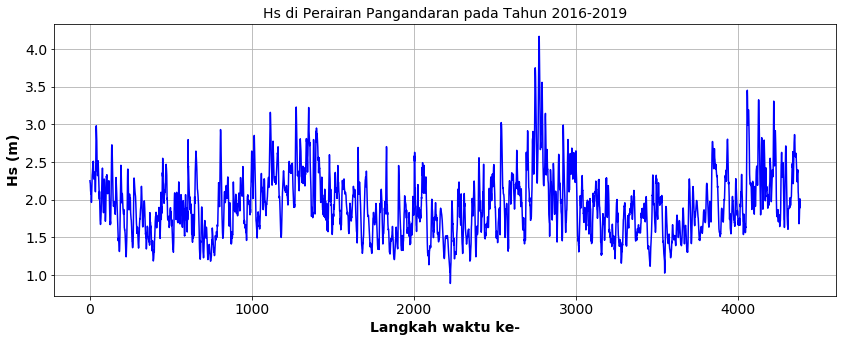

In [78]:
fig, ax = plt.subplots(figsize=(14,5)) # mengatur ukuran frame plot

hs.plot(ax=ax, color='blue') # plot line plot
ax.set_ylabel('Hs (m)', fontsize=14, fontweight='bold') # set y-label
ax.set_xlabel('Langkah waktu ke-', fontsize=14, fontweight='bold') # set x-label
ax.set_title('Hs di Perairan Pangandaran pada Tahun 2016-2019', fontsize=14) # set judul

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

ax.grid() # menambahkan grid

In [79]:
print('== Statistika Deskriptif Hs Pangandaran')
display(hs.describe())

== Statistika Deskriptif Hs Pangandaran


count    4384.000000
mean        1.931949
std         0.416329
min         0.887838
25%         1.626775
50%         1.887254
75%         2.185461
max         4.167683
Name: Pangandaran, dtype: float64

### Histogram

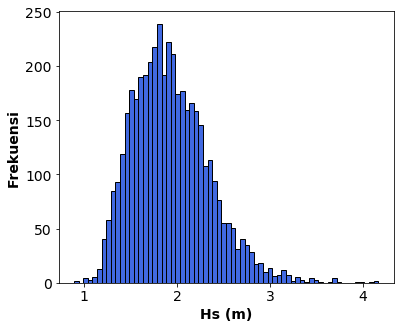

In [80]:
import math

n_bins = math.sqrt(len(hs)) #jumlah bin histogram
fig, ax = plt.subplots(figsize=(6,5)) # mengatur ukuran frame plot

hs.hist(ax=ax, bins= int(n_bins), color='royalblue', edgecolor='black') # plot histogram

ax.set_ylabel('Frekuensi', fontsize=14, fontweight='bold') # set y-label
ax.set_xlabel('Hs (m)', fontsize=14, fontweight='bold') # set x-label
ax.set_title('', fontsize=14) # set judul

ax.grid(False) # grid

## Persiapan Data
Dalam mengembangkan model machine learning, ada dua tahapan utama yang harus dilakukan, yaitu pelatihan/training model hingga diperoleh parameter yang optimal, dan mengujinya dengan data yang tidak digunakan ketika training. Oleh karena itu, umumnya dalam machine learning, data dibagi menjadi data **training** dan **testing**.

### Pembagian Data Training dan Testing

In [81]:
# untuk mempermudah dalam pembagian data, type data di konversi kedalam bentuk array/matriks
hs_array = np.array([hs]).T # di-transpose agar datanya memanjang kebawah/baris
print('Tipe data sebelum:', type(hs))
print('Tipe data sesudah:', type(hs_array))
print('Dimensi data:', hs_array.shape)

Tipe data sebelum: <class 'pandas.core.series.Series'>
Tipe data sesudah: <class 'numpy.ndarray'>
Dimensi data: (4384, 1)


In [82]:
# membagi data kedalam training dan test set
n_train = int(len(hs)*0.80) # 80%
X_train = hs_array[:n_train, :]
y_train = hs_array[:n_train]
print("x_train = ", X_train.shape)
print("y_train = ", y_train.shape)

X_test = hs_array[n_train:, :]
y_test = hs_array[n_train:]
print("x_test = ", X_test.shape)
print("y_test = ", y_test.shape)

x_train =  (3507, 1)
y_train =  (3507, 1)
x_test =  (877, 1)
y_test =  (877, 1)


### Feature Engineering: Standarisasi Data
Feature engineering adalah proses **modifikasi data untuk memaksimalkan performa model machine learning**. Modifikasi disini bisa meliputi beberapa hal, seperti **penambahan data input baru**, atau **rekayasa input yang sudah ada**. Dalam notebook ini, FE yang dilakukan adalah rekayasa nilai input yang sudah ada, dengan melakukan **standarisasi**, dengan menjadikan mean menjadi 0, dan standar deviasi menjadi 1.

Standarisasi = (X - mean)/standar deviasi

In [83]:
from sklearn.preprocessing import StandardScaler # import modul untuk melakukan standarisasi

scaler = StandardScaler() # standarisasi data

# disini yg perlu distandarisasi adalah data inputnya (training dan testing), untuk data output tidak perlu
X_train_scaled = scaler.fit_transform(X_train) # melakukan standarisasi terhadap data input training
X_test_scaled = scaler.fit_transform(X_test) # melakukan standarisasi terhadap data input testing

print('Raw Hs:\n', X_train[:5])
print('\nScaled Hs:\n', X_train_scaled[:5])

Raw Hs:
 [[2.25089846]
 [2.22506456]
 [2.22347361]
 [2.16635113]
 [2.11475908]]

Scaled Hs:
 [[0.80593998]
 [0.74336401]
 [0.73951036]
 [0.6011459 ]
 [0.47617747]]


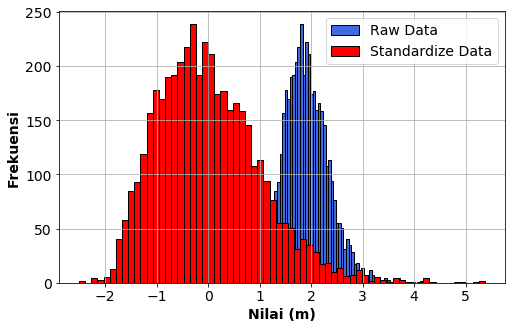

In [84]:
# buktinya
hs_scaled = scaler.fit_transform(hs_array)

# plot histogram
fig, ax = plt.subplots(figsize=(8,5)) # mengatur ukuran frame plot

hs.hist(ax=ax, bins= int(n_bins), color='royalblue', edgecolor='black') # plot histogram
pd.DataFrame(hs_scaled).hist(ax=ax, bins= int(n_bins), color='red', edgecolor='black') # plot histogram

ax.set_ylabel('Frekuensi', fontsize=14, fontweight='bold') # set y-label
ax.set_xlabel('Nilai (m)', fontsize=14, fontweight='bold') # set x-label
ax.set_title('', fontsize=14) # set judul
ax.legend(['Raw Data', 'Standardize Data'])

ax.grid(True) # menambahkan grid

## Machine Learning

Model Machine Learning
Disini digunakan **Support Vector Regressor**, yang merupakan varian dari support vector machine. **SVR** bekerja dengan meminimalkan nilai **xi** terhadap **decision boundary** (garis putus-putus).

<div>
<img src="SVR3.jpeg" width="500"/>
</div>

[Image Source](https://www.researchgate.net/publication/320916953_Predicting_Top-of-Atmosphere_Thermal_Radiance_Using_MERRA-2_Atmospheric_Data_with_Deep_Learning)

In [85]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf') # kernel rbf dapat diandalkan ketika berhadapan dgn data non-linear
regressor.fit(X_train_scaled, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Prediksi terhadap data Training dan Testing

In [86]:
pred_train = regressor.predict(X_train_scaled)
pred_test = regressor.predict(X_test_scaled)

### Plot hasil prediksi

In [87]:
def plot_hasil(pred, obs, color_plot, dataset):
    plt.figure(figsize=(12,5))
    plt.plot(pred, color=color_plot)
    plt.plot(obs, color='red')
    plt.title('Perbandingan data hasil prediksi dan observasi'+' '+dataset, fontsize=14)
    plt.xlabel('Data ke-', fontsize=12)
    plt.ylabel('Hs (m)', fontsize=12)
    plt.legend(['Prediksi','Observasi'])
    plt.grid(True)

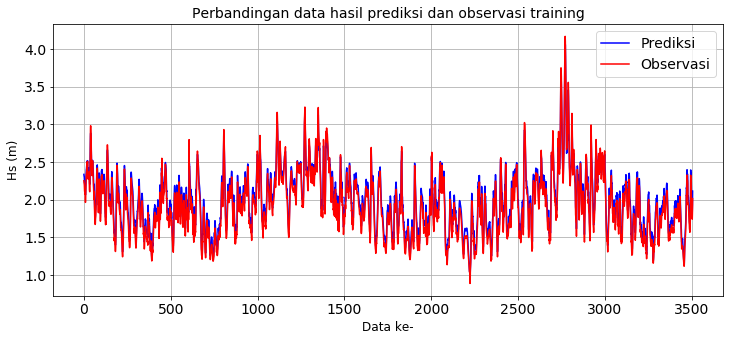

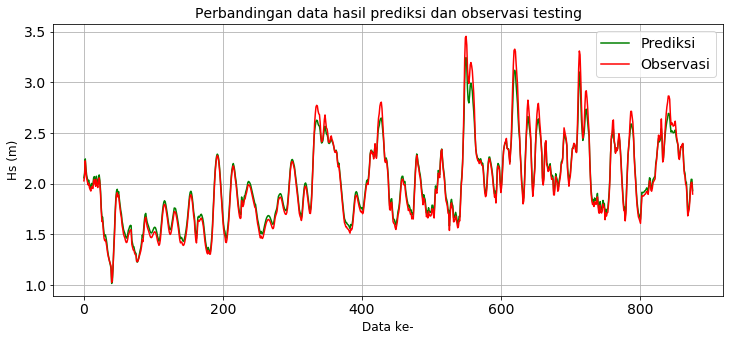

In [88]:
# plot hasil
plot_hasil(pred_train, y_train, 'blue', 'training')
plot_hasil(pred_test, y_test, 'green', 'testing')

plt.show()

## Verifikasi hasil
Disini digunakan nilai RMSE dan bias untuk memverifikasi hasil.

In [89]:
from sklearn.metrics import mean_squared_error

rmse_train = math.sqrt(mean_squared_error(pred_train, y_train))
rmse_test = math.sqrt(mean_squared_error(pred_test, y_test))
bias_train = np.mean(pred_train - y_train)
bias_test = np.mean(pred_test - y_test)

print('RMSE Train data : %.2f cm' %(rmse_train*100))
print('RMSE Test data : %.2f cm' %(rmse_test*100))
print('Bias Train :', bias_train)
print('Bias Test : ', bias_test)

RMSE Train data : 9.13 cm
RMSE Test data : 5.78 cm
Bias Train : 0.07984653559412805
Bias Test :  0.008818730785720418
